# **CSC 510 Assignment 2**

### This Jupyter Notebook file is about understanding machine learning techniques via comparing regression models in two-dimensional and three-dimensional visuals on computer-generated datasets of varying observation sizes and the "recent-grads.csv" file & "grad-students.csv" file, and using the Random Forest classification model to select the best features in the "nslkdd-version1.csv" file & "nslkdd-version2.csv"

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
conf = SparkConf().setAppName("CSC 510 Assignment 2").setMaster("spark://127.0.0.1:7077")
sc = SparkContext.getOrCreate(conf)

In [3]:
sc

<SparkContext master=spark://127.0.0.1:7077 appName=CSC 510 Assignment 2>

In [4]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [5]:
import random, numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

## *Comparison of Regression Models*
### *Generated Data Points*

**Standard Regression**

*1-D Data Domain*

In [6]:
def generate_1D_points(length):
    x = np.array(np.round(np.array([random.uniform(0, 4) for x in range(length)]), decimals=1))
    y = np.array(np.round(np.array([random.uniform(0, 12) for y in range(length)]), decimals=1))
    return x,y

In [7]:
def std_reg_1D(x,y):
    X = np.vstack([x, np.ones(len(x))]).T
    A = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
    xt = [0,4]
    yt = A * xt
    title = ('Standard Regression of x and y (%d Observations)' % len(x))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter(x, y, label='x and y Values')
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
    plt.axis([0,4,0,12])
    plt.grid(True)
    plt.legend(fontsize=18)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/std_reg_1d_%d_obsv.jpeg" % len(x))
    plt.savefig(savefig_title)
    plt.show()

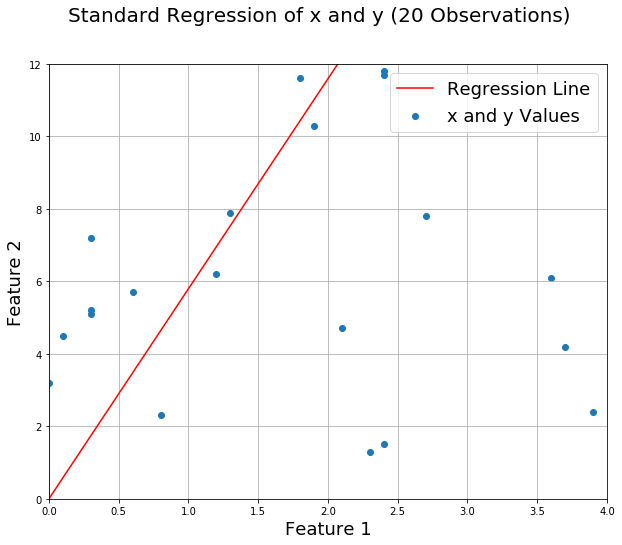

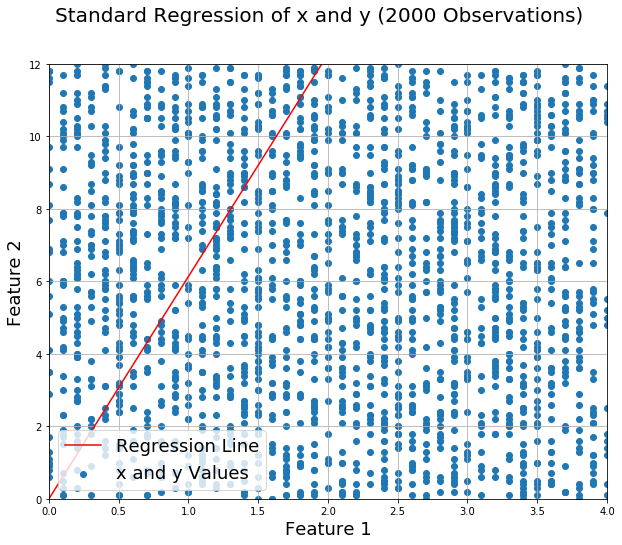

In [8]:
x_20,y_20 = generate_1D_points(20)
std_reg_1D(x_20,y_20)

x_2000,y_2000 = generate_1D_points(2000)
std_reg_1D(x_2000,y_2000)

2-D Data Domain

In [9]:
def generate_2D_points(length):
    x1 = np.array(np.round(np.array([random.uniform(0, 4) for x in range(length)]), decimals=1))
    x2 = np.array(np.round(np.array([random.uniform(0, 4) for x in range(length)]), decimals=1))
    yy = np.array(np.round(np.array([random.uniform(0, 12) for y in range(length)]), decimals=1))
    return x1,x2,yy

In [10]:
def std_reg_2D(x1,x2,yy):
    XX = np.vstack([x1, x2]).T
    AA = (np.linalg.inv(XX.T.dot(XX)).dot(XX.T)).dot(yy)
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Standard Regression of x1, x2, and yy (%d Observations)' % len(x1))
    figure.suptitle(title, fontsize=20)
    ax.scatter(x1,x2,yy,label='x1, x2, and yy Values',c='r')
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='b')
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("Feature 1", fontsize=16)
    ax.set_ylabel("Feature 2", fontsize=16)
    ax.set_zlabel("Responses",fontsize=16)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/std_reg_2d_%d_obsv.jpeg" % len(x1))
    figure.savefig(savefig_title)

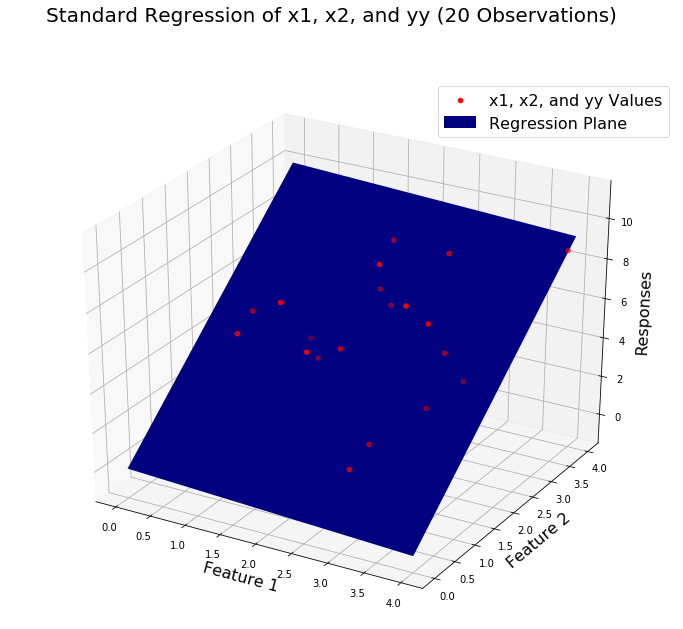

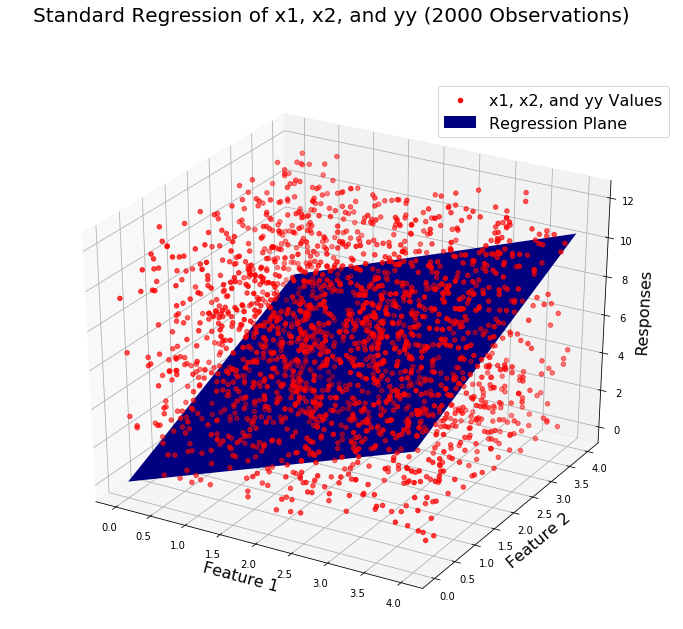

In [11]:
x1_20,x2_20,yy_20 = generate_2D_points(20)
std_reg_2D(x1_20,x2_20,yy_20)

x1_2000,x2_2000,yy_2000 = generate_2D_points(2000)
std_reg_2D(x1_2000,x2_2000,yy_2000)

**Ridge Recession**

*1-D Data Domain*

In [12]:
def ridge_reg_1D(x,y):
    _lambda = 0.1
    X = np.vstack([x, np.ones(len(x))]).T
    A = (np.linalg.inv(X.T.dot(X) + _lambda).dot(X.T)).dot(y)
    xt = [0,4]
    yt = A * xt
    title = ('Ridge Regression of x and y (%d Observations)' % len(x))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter(x, y, label='x and y Values')
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
    plt.axis([0,4,0,12])
    plt.grid(True)
    plt.legend(fontsize=18)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/ridge_reg_1d_%d_obsv.jpeg" % len(x))
    plt.savefig(savefig_title)
    plt.show()

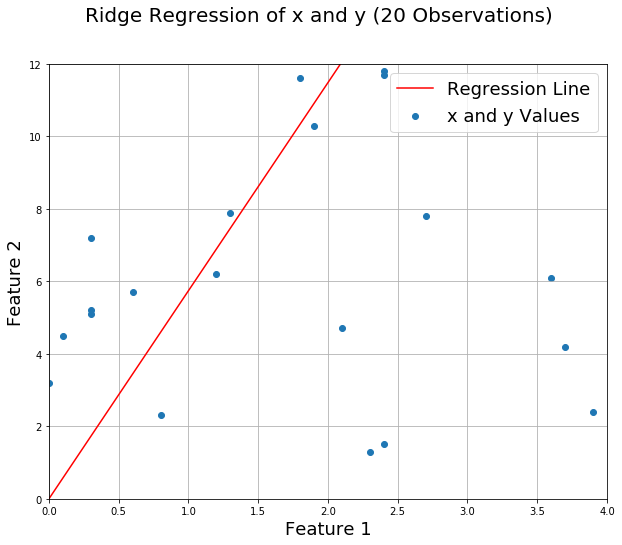

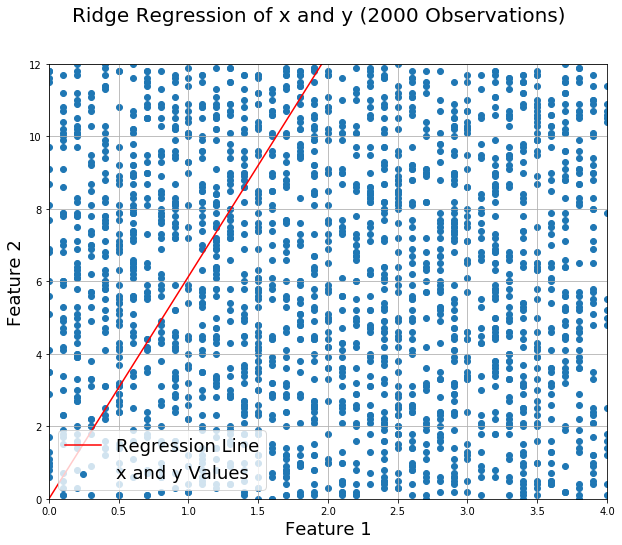

In [13]:
ridge_reg_1D(x_20,y_20)

ridge_reg_1D(x_2000,y_2000)

*2-D Data Domain*

In [14]:
def ridge_reg_2D(x1,x2,yy):
    _lambda = 0.1
    XX = np.vstack([x1, x2]).T
    nn = len(XX.T.dot(XX))
    AA = (np.linalg.inv(XX.T.dot(XX) + (_lambda * np.eye(nn)))).dot(XX.T).dot(yy)
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Ridge Regression of x1, x2, and yy (%d Observations)' % len(x1))
    figure.suptitle(title, fontsize=20)
    ax.scatter(x1,x2,yy,label='x1, x2, and yy Values',c='r')
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='b')
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("Feature 1", fontsize=16)
    ax.set_ylabel("Feature 2", fontsize=16)
    ax.set_zlabel("Responses",fontsize=16)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/ridge_reg_2d_%d_obsv.jpeg" % len(x1))
    figure.savefig(savefig_title)

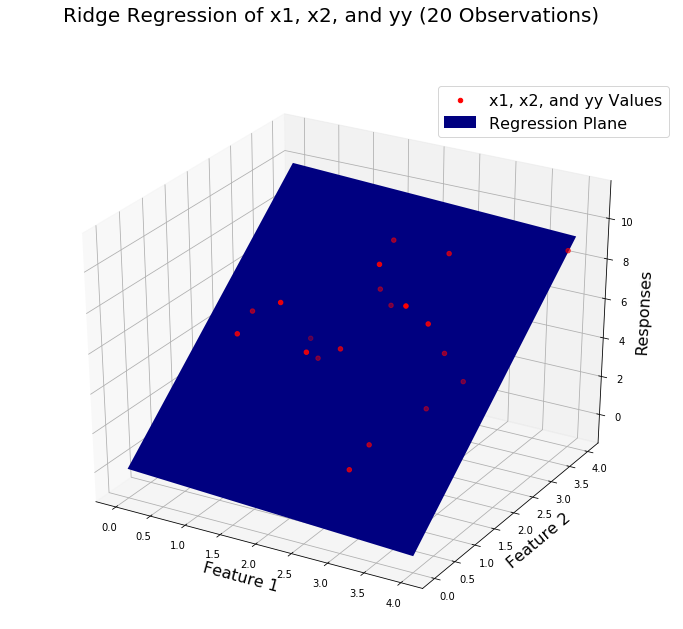

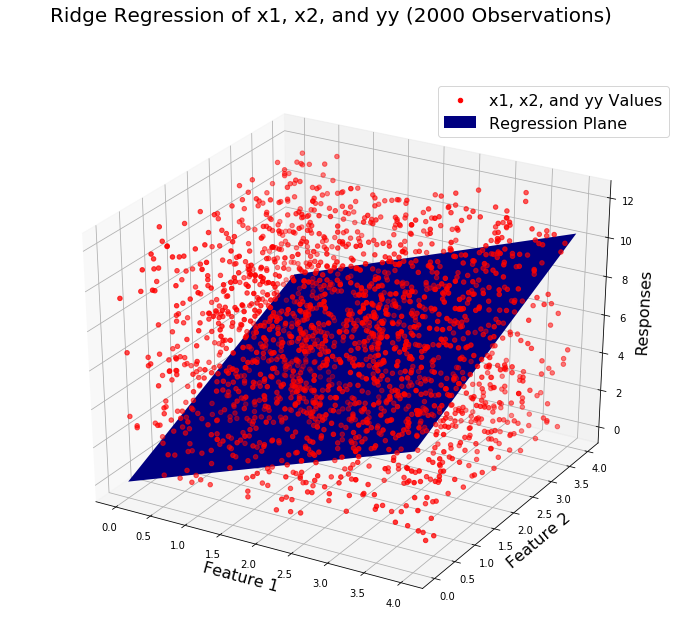

In [15]:
ridge_reg_2D(x1_20,x2_20,yy_20)

ridge_reg_2D(x1_2000,x2_2000,yy_2000)

**Lasso Regression**

*1-D Data Domain*

In [16]:
def lasso_reg_1D(x,y):
    _lambda = 0.1
    X = np.vstack([x, np.ones(len(x))]).T
    A1 = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
    S = np.sign(A1)
    A = (np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y) - (S * _lambda / 2)))
    xt = [0,4]
    yt = A * xt
    title = ('Lasso Regression of x and y (%d Observations)' % len(x))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter(x, y, label='x and y Values')
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
    plt.axis([0,4,0,12])
    plt.grid(True)
    plt.legend(fontsize=18)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/lasso_reg_1d_%d_obsv.jpeg" % len(x))
    plt.savefig(savefig_title)
    plt.show()

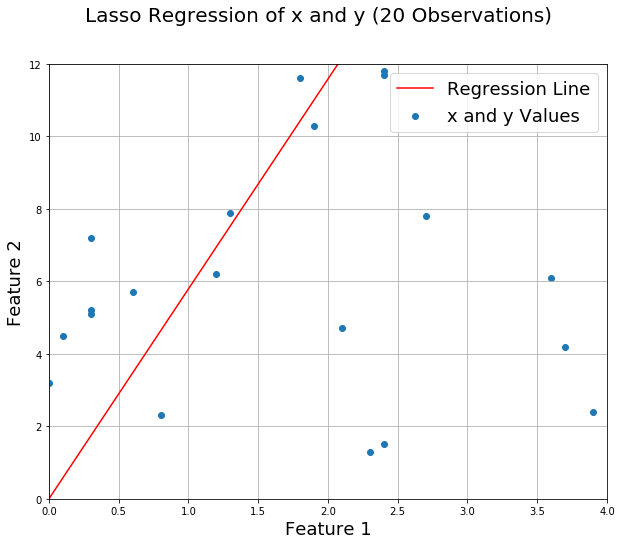

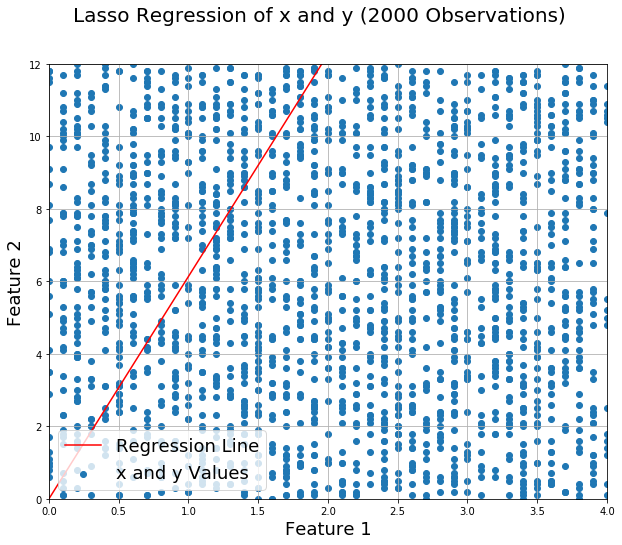

In [17]:
lasso_reg_1D(x_20,y_20)

lasso_reg_1D(x_2000,y_2000)

In [18]:
def lasso_reg_2D(x1,x2,yy):
    _lambda = 0.1
    XX = np.vstack([x1, x2]).T
    nn = len(XX.T.dot(XX))
    AA1 = (np.linalg.inv(XX.T.dot(XX))).dot(XX.T).dot(yy)
    SS = np.sign(AA1)
    AA = (np.linalg.inv(XX.T.dot(XX)).dot(XX.T.dot(yy) - (SS * _lambda / 2)))
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Lasso Regression of x1, x2, and yy (%d Observations)' % len(x1))
    figure.suptitle(title, fontsize=20)
    ax.scatter(x1,x2,yy,label='x1, x2, and yy Values',c='r')
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='b')
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("Feature 1", fontsize=16)
    ax.set_ylabel("Feature 2", fontsize=16)
    ax.set_zlabel("Responses",fontsize=16)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/lasso_reg_2d_%d_obsv.jpeg" % len(x1))
    figure.savefig(savefig_title)

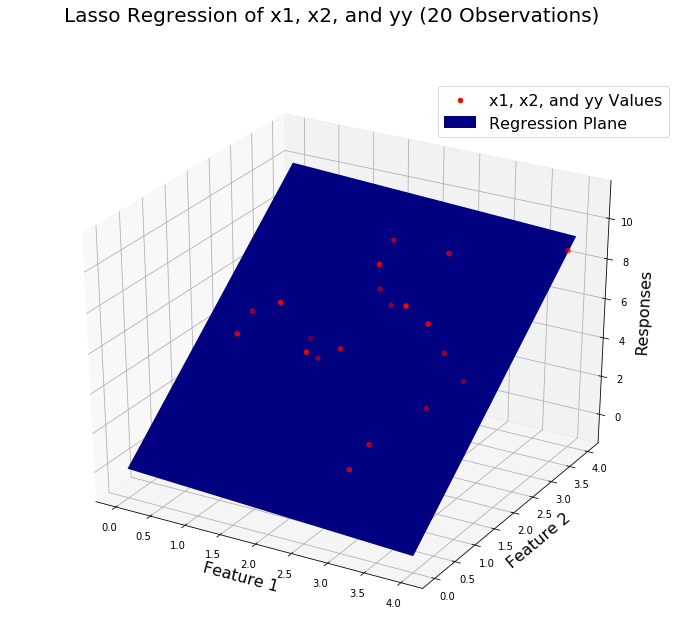

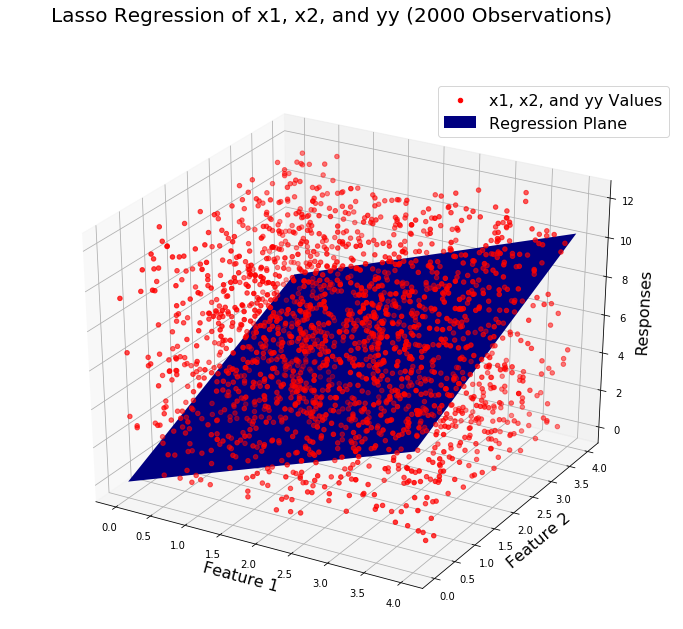

In [19]:
lasso_reg_2D(x1_20,x2_20,yy_20)

lasso_reg_2D(x1_2000,x2_2000,yy_2000)

**Elastic-Net Regression**

*1-D Data Domain*

In [20]:
def en_reg_1D(x,y):
    lambda1 = 0.1
    lambda2 = 0.2
    X = np.vstack([x, np.ones(len(x))]).T
    A1 = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
    S = np.sign(A1)
    A = (np.linalg.inv(X.T.dot(X) + lambda1).dot(X.T.dot(y) - (S * lambda2 / 2)))
    xt = [0,4]
    yt = A * xt
    title = ('Elasctic-Net Regression of x and y (%d Observations)' % len(x))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter(x, y, label='x and y Values')
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
    plt.axis([0,4,0,12])
    plt.grid(True)
    plt.legend(fontsize=18)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/en_reg_1d_%d_obsv.jpeg" % len(x))
    plt.savefig(savefig_title)
    plt.show()

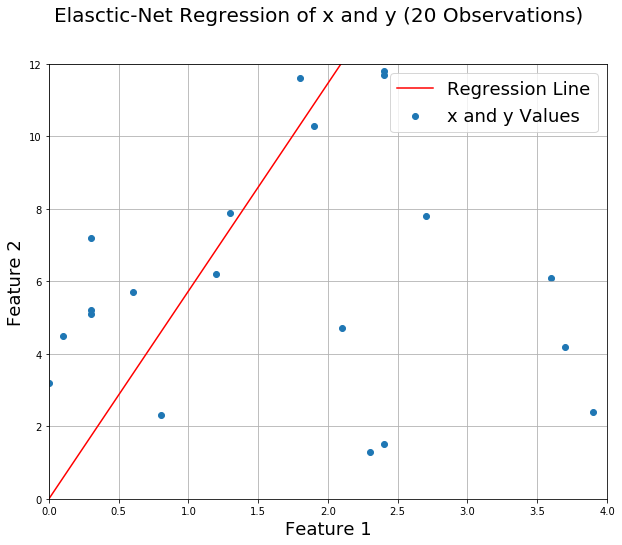

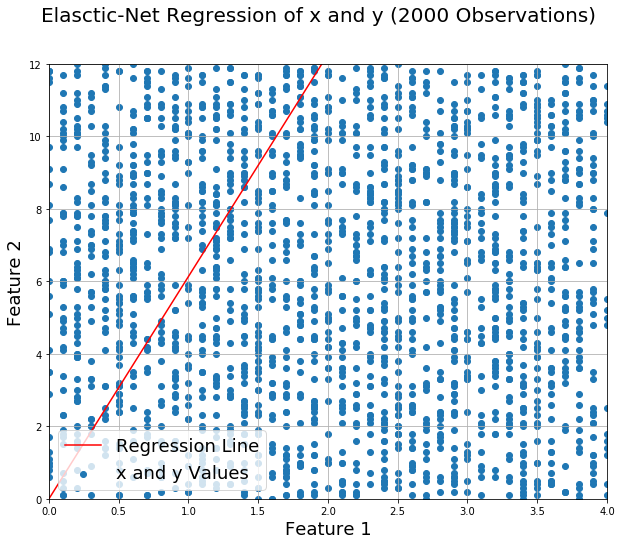

In [21]:
en_reg_1D(x_20,y_20)

en_reg_1D(x_2000,y_2000)

*2-D Data Domain*

In [22]:
def en_reg_2D(x1,x2,yy):
    lambda1 = 0.1
    lambda2 = 0.2
    XX = np.vstack([x1, x2]).T
    nn = len(XX.T.dot(XX))
    AA1 = (np.linalg.inv(XX.T.dot(XX))).dot(XX.T).dot(yy)
    SS = np.sign(AA1)
    AA = (np.linalg.inv(XX.T.dot(XX) + (lambda1 * np.eye(nn))).dot(XX.T.dot(yy) - (SS * lambda2 / 2)))
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Elastic-Net Regression of x1, x2, and yy (%d Observations)' % len(x1))
    figure.suptitle(title, fontsize=20)
    ax.scatter(x1,x2,yy,label='x1, x2, and yy Values',c='r')
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='b')
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("Feature 1", fontsize=16)
    ax.set_ylabel("Feature 2", fontsize=16)
    ax.set_zlabel("Responses",fontsize=16)
    ax.set_zlabel("Responses",fontsize=16)
    savefig_title = ("../../docs/CSC510_Assignment2_docs/en_reg_2d_%d_obsv.jpeg" % len(x1))
    figure.savefig(savefig_title)

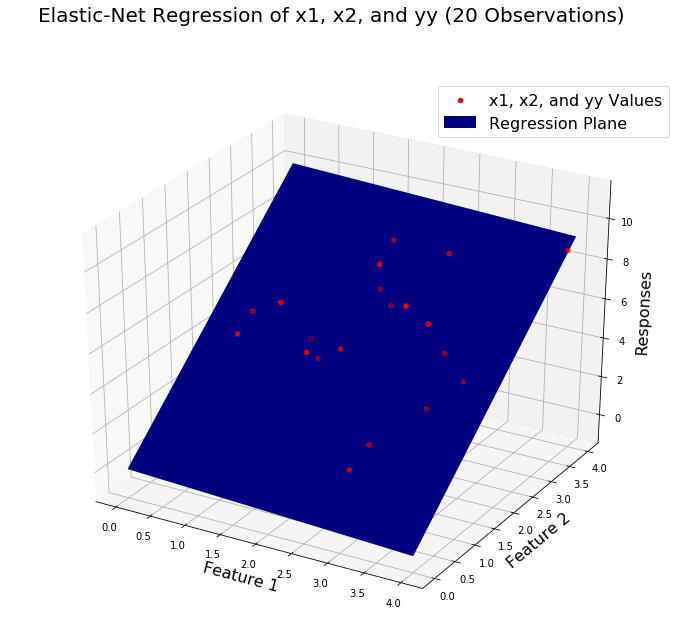

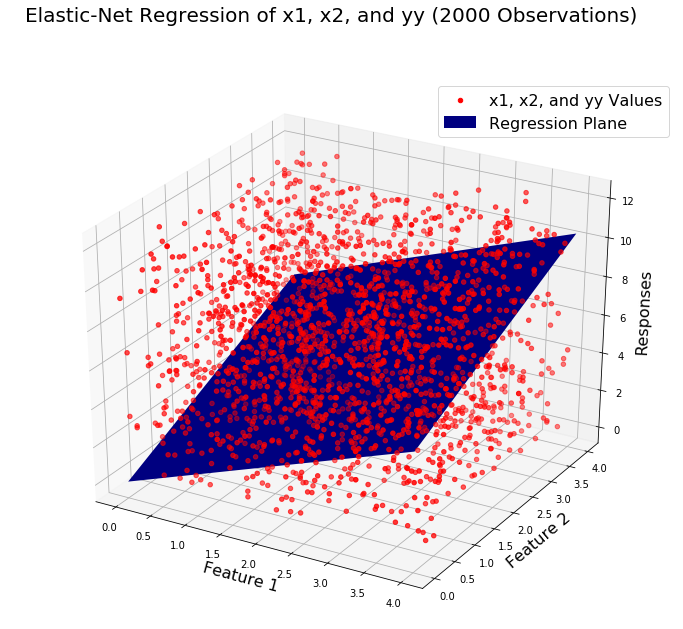

In [23]:
en_reg_2D(x1_20,x2_20,yy_20)

en_reg_2D(x1_2000,x2_2000,yy_2000)

### *Graduate Student Data Points*

In [24]:
recent_grads = sqlContext.read.csv("../../data/CSC-510_Assignment2_Data/recent-grads.csv", inferSchema="true", header=True)
grads = sqlContext.read.csv("../../data/CSC-510_Assignment2_Data/grad-students.csv", inferSchema="true", header=True)

In [25]:
recent_feats = [dt[0] for dt in recent_grads.dtypes if dt[1] == 'int' or dt[1] == 'double']
grad_feats = [dt[0] for dt in grads.dtypes if dt[1] == 'int' or dt[1] == 'double']
print(recent_feats)
print(grad_feats)

['Rank', 'Major_code', 'Total', 'Men', 'Women', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time', 'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs']
['Major_code', 'Grad_total', 'Grad_sample_size', 'Grad_employed', 'Grad_full_time_year_round', 'Grad_unemployed', 'Grad_unemployment_rate', 'Grad_P25', 'Nongrad_total', 'Nongrad_employed', 'Nongrad_full_time_year_round', 'Nongrad_unemployed', 'Nongrad_unemployment_rate', 'Nongrad_P25', 'Grad_share', 'Grad_premium']


In [26]:
from pyspark.sql import functions
pop_major_rg = [item[0] for item in recent_grads.groupby(recent_grads.Major_category)
                .agg(functions.sum('Total').alias('Popularity')).orderBy('Popularity', ascending=False)
                .collect()][:2]
pop_major_g = [item[0] for item in grads.groupby(grads.Major_category)
               .agg(functions.sum('Grad_total').alias('Popularity')).orderBy('Popularity', ascending=False)
               .collect()][:2]
print(pop_major_rg)
print(pop_major_g)

['Business', 'Humanities & Liberal Arts']
['Education', 'Humanities & Liberal Arts']


In [27]:
rg_x1 = np.array([(emp[0] / 100000,maj[0]) for emp,maj in zip(
    recent_grads[(recent_grads.Major_category == pop_major_rg[0]) |
                 (recent_grads.Major_category == pop_major_rg[1])].select('Employed').collect(),
    recent_grads[(recent_grads.Major_category == pop_major_rg[0]) |
                 (recent_grads.Major_category == pop_major_rg[1])].select('Major_category').collect())])
rg_x2 = np.array([(emp[0] / 10000,maj[0]) for emp,maj in zip(
    recent_grads[(recent_grads.Major_category == pop_major_rg[0]) |
                 (recent_grads.Major_category == pop_major_rg[1])].select('Unemployed').collect(),
    recent_grads[(recent_grads.Major_category == pop_major_rg[0]) |
                 (recent_grads.Major_category == pop_major_rg[1])].select('Major_category').collect())])
rg_yy = np.array([(emp[0],maj[0]) for emp,maj in zip(
    recent_grads[(recent_grads.Major_category == pop_major_rg[0]) |
                 (recent_grads.Major_category == pop_major_rg[1])].select('Unemployment_rate').collect(),
    recent_grads[(recent_grads.Major_category == pop_major_rg[0]) |
                 (recent_grads.Major_category == pop_major_rg[1])].select('Major_category').collect())])

g_x1 = np.array([(emp[0] / 100000,maj[0]) for emp,maj in zip(
    grads[(grads.Major_category == pop_major_g[0]) |
          (grads.Major_category == pop_major_g[1])].select('Grad_employed').collect(),
    grads[(grads.Major_category == pop_major_g[0]) |
          (grads.Major_category == pop_major_g[1])].select('Major_category').collect())])
g_x2 = np.array([(emp[0] / 10000,maj[0]) for emp,maj in zip(
    grads[(grads.Major_category == pop_major_g[0]) |
          (grads.Major_category == pop_major_g[1])].select('Grad_unemployed').collect(),
    grads[(grads.Major_category == pop_major_g[0]) |
          (grads.Major_category == pop_major_g[1])].select('Major_category').collect())])
g_yy = np.array([(emp[0],maj[0]) for emp,maj in zip(
    grads[(grads.Major_category == pop_major_g[0]) |
          (grads.Major_category == pop_major_g[1])].select('Grad_unemployment_rate').collect(),
    grads[(grads.Major_category == pop_major_g[0]) |
          (grads.Major_category == pop_major_g[1])].select('Major_category').collect())])

**Standard Regression**

*1-D Data Domain*

In [28]:
def grad_std_reg_1D(x,y,maj,df_type):
    x_val = np.array([item[0] for item in x], dtype=np.float32)
    y_val = np.array([item[0] for item in y], dtype=np.float32)
    x_label = [item[1] for item in x]
    y_label = [item[1] for item in y]
    X = np.vstack([x_val, np.ones(len(x))]).T
    A = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y_val)
    xt = [0,4]
    yt = A * xt
    title = ('Standard Regression of %s unemployment and unemployment_rate (%d Observations)' %
             (df_type,len(x_val)))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[0]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[0]], label=maj[0] + " values")
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[1]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[1]], label=maj[1] + " values")
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("unemployment * 10000", fontsize=18)
    plt.ylabel("unemployment_rate", fontsize=18)
    plt.grid(True)
    plt.legend(fontsize=18)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/std_reg_1d_%s.jpeg" % grad_status)
    plt.savefig(savefig_title)
    plt.show()

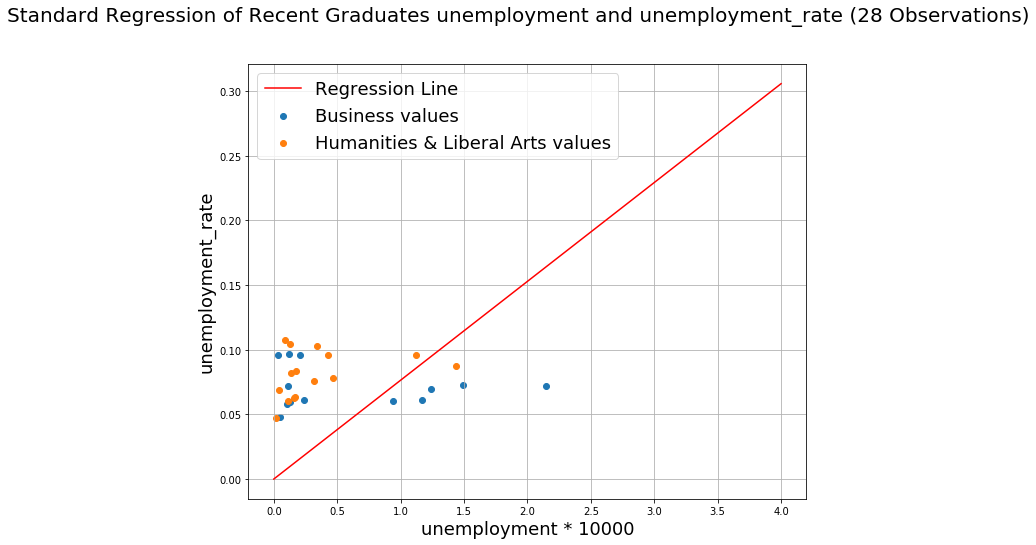

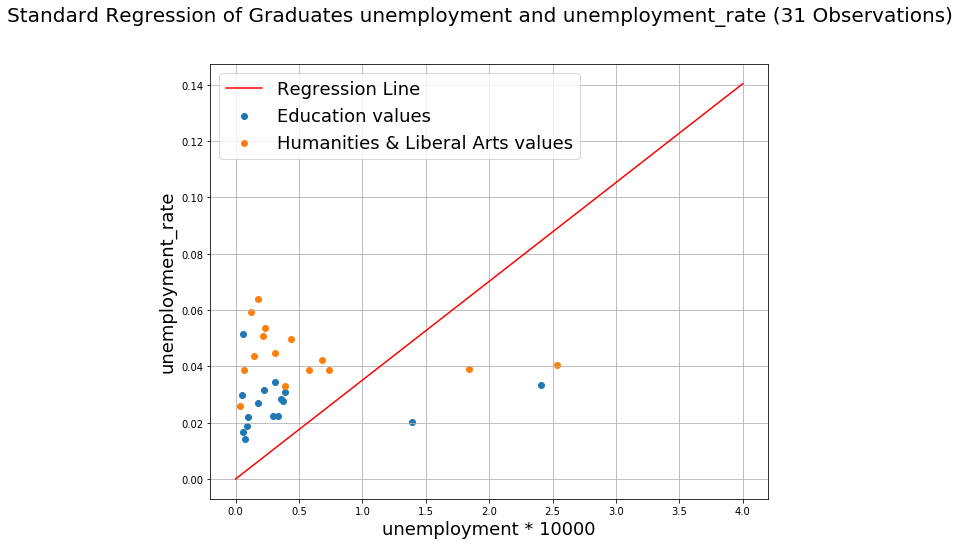

In [29]:
grad_std_reg_1D(rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_std_reg_1D(g_x2, g_yy, pop_major_g, "Graduates")

*2-D Data Domain*

In [30]:
def grad_std_reg_2D(x1,x2,yy,maj,df_type):
    x1_val = np.array([item[0] for item in x1], dtype=np.float32)
    x1_label = [item[1] for item in x1]
    x2_val = np.array([item[0] for item in x2], dtype=np.float32)
    x2_label = [item[1] for item in x2]
    yy_val = np.array([item[0] for item in x2], dtype=np.float32)
    yy_label = [item[1] for item in yy]
    XX = np.vstack([x1_val, x2_val]).T
    AA = (np.linalg.inv(XX.T.dot(XX)).dot(XX.T)).dot(yy_val)
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Standard Regression of %s employment, unemployment, and unemployment_rate (%d Observations)'
             % (df_type,len(x1_val)))
    figure.suptitle(title, fontsize=20)
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[0]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[0]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[0]], label=maj[0] + " values",
               alpha=1.0, cmap="Blue")
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[1]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[1]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[1]], label=maj[0] + " values",
               alpha=1.0, cmap="Orange")
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',alpha=0.5,color="gray")
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("employment * 100000", fontsize=16)
    ax.set_ylabel("unemployment * 10000", fontsize=16)
    ax.set_zlabel("unemployment_rate",fontsize=16)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/std_reg_2d_%s.jpeg" % grad_status)
    figure.savefig(savefig_title)

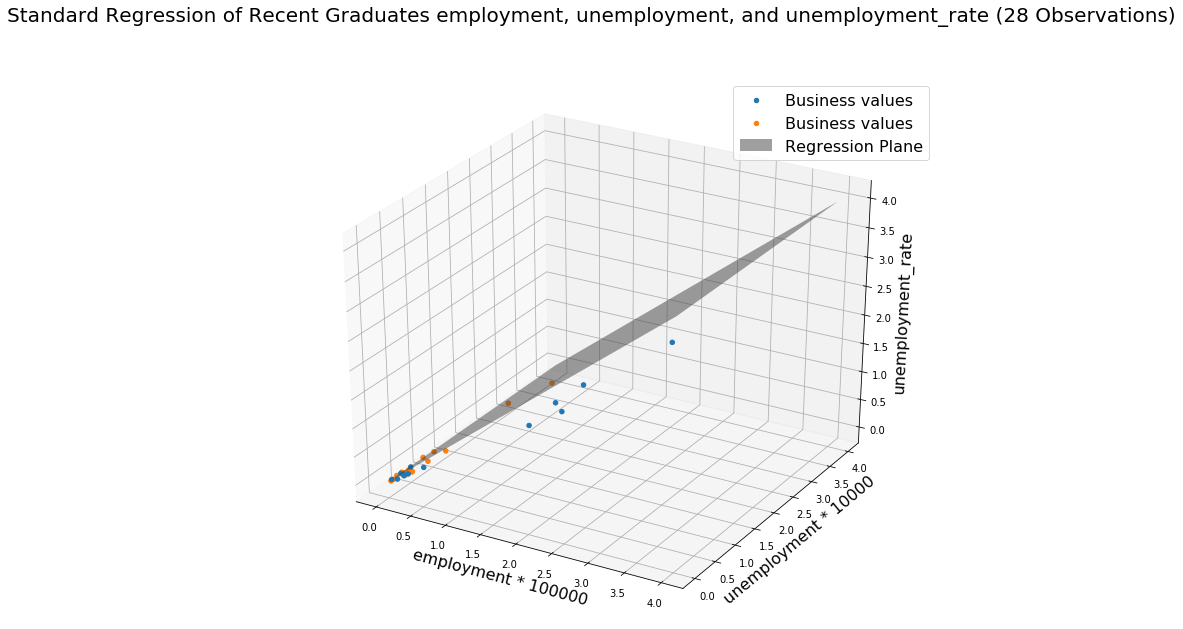

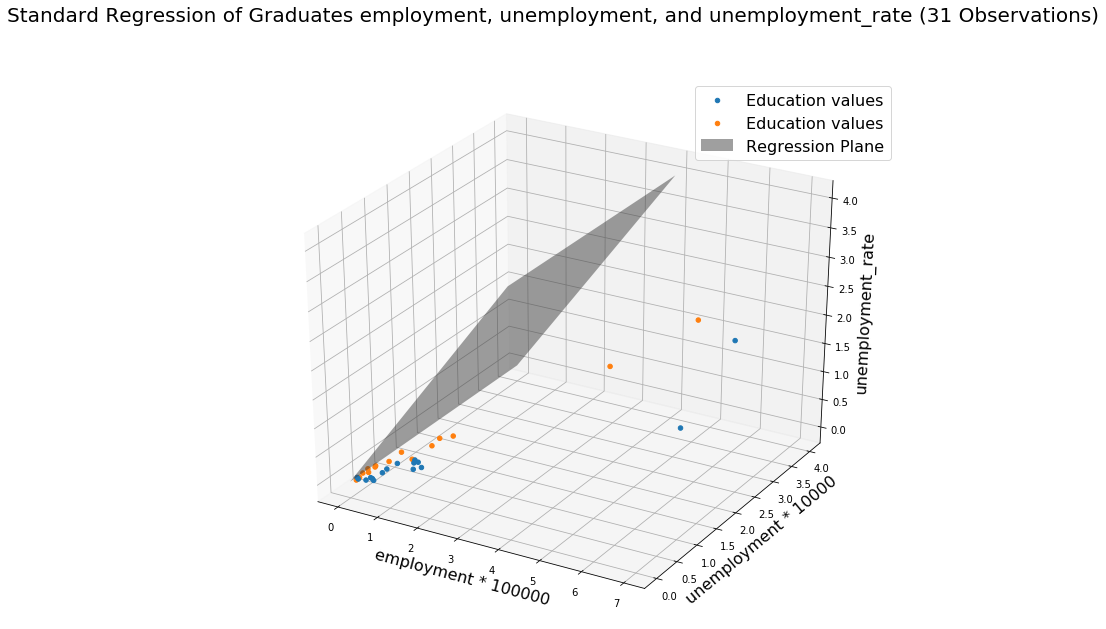

In [31]:
grad_std_reg_2D(rg_x1, rg_x2, rg_yy, pop_major_rg,"Recent Graduates")

grad_std_reg_2D(g_x1, g_x2, g_yy, pop_major_g,"Graduates")

**Ridge Regression**

*1-D Data Domain*

In [32]:
def grad_ridge_reg_1D(x,y,maj,df_type):
    x_val = np.array([item[0] for item in x], dtype=np.float32)
    y_val = np.array([item[0] for item in y], dtype=np.float32)
    x_label = [item[1] for item in x]
    y_label = [item[1] for item in y]
    _lambda = 0.1
    X = np.vstack([x_val, np.ones(len(x_val))]).T
    A = (np.linalg.inv(X.T.dot(X) + _lambda).dot(X.T)).dot(y_val)
    xt = [0,4]
    yt = A * xt
    title = ('Ridge Regression of %s unemployment and unemployment_rate (%d Observations)' %
             (df_type,len(x_val)))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[0]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[0]], label=maj[0] + " values")
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[1]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[1]], label=maj[1] + " values")
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("unemployment * 10000", fontsize=18)
    plt.ylabel("unemployment_rate", fontsize=18)
    plt.grid(True)
    plt.legend(fontsize=18)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/ridge_reg_1d_%s.jpeg" % grad_status)
    plt.savefig(savefig_title)
    plt.show()

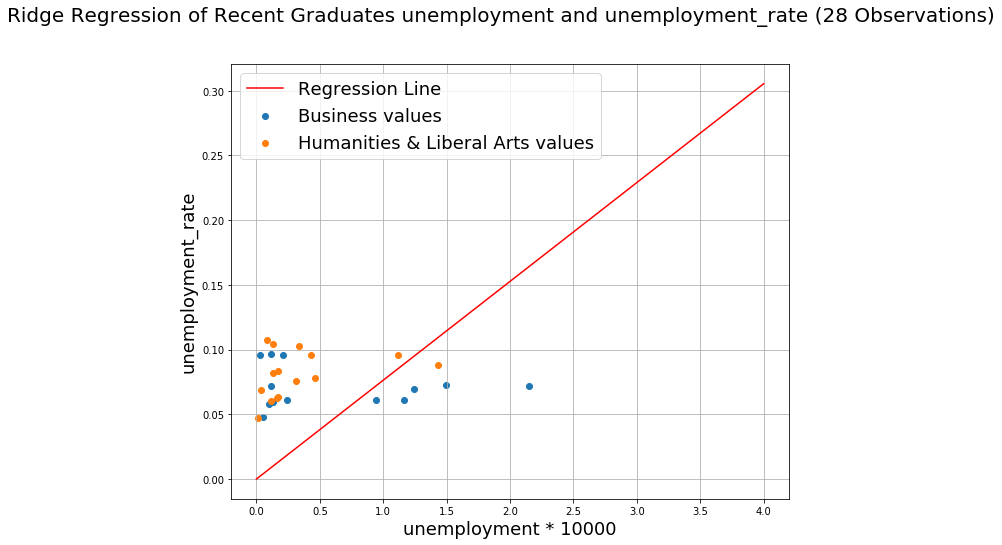

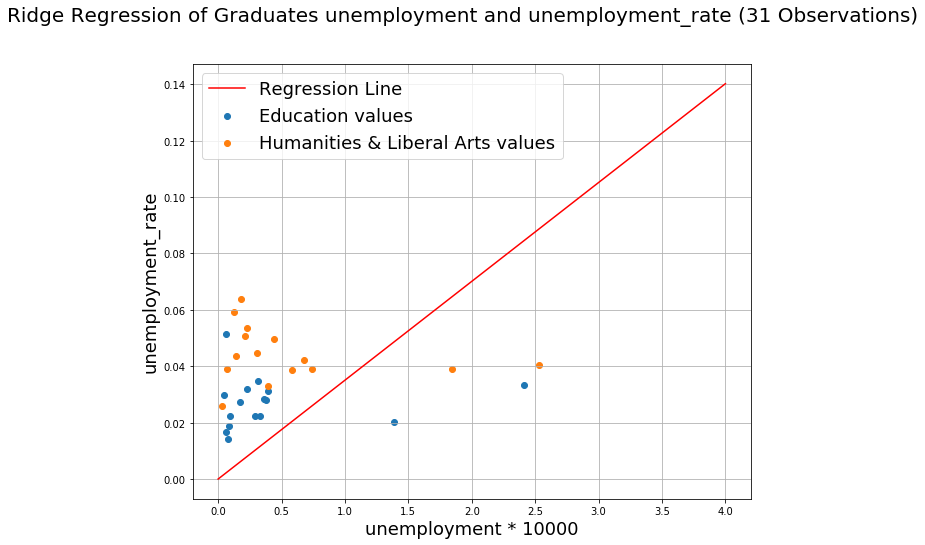

In [33]:
grad_ridge_reg_1D(rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_ridge_reg_1D(g_x2, g_yy, pop_major_g, "Graduates")

*2-D Data Domain*

In [34]:
def grad_ridge_reg_2D(x1,x2,yy,maj,df_type):
    x1_val = np.array([item[0] for item in x1], dtype=np.float32)
    x1_label = [item[1] for item in x1]
    x2_val = np.array([item[0] for item in x2], dtype=np.float32)
    x2_label = [item[1] for item in x2]
    yy_val = np.array([item[0] for item in x2], dtype=np.float32)
    yy_label = [item[1] for item in yy]
    _lambda = 0.1
    XX = np.vstack([x1_val, x2_val]).T
    nn = len(XX.T.dot(XX))
    AA = (np.linalg.inv(XX.T.dot(XX) + (_lambda * np.eye(nn)))).dot(XX.T).dot(yy_val)
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Ridge Regression of %s employment, unemployment, and unemployment_rate (%d Observations)' %
             (df_type,len(x1_val)))
    figure.suptitle(title, fontsize=20)
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[0]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[0]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[0]], label=maj[0] + " values",
               alpha=1.0, cmap="Blue")
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[1]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[1]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[1]], label=maj[0] + " values",
               alpha=1.0, cmap="Orange")
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='gray',alpha=0.5)
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("employment * 100000", fontsize=16)
    ax.set_ylabel("unemployment * 10000", fontsize=16)
    ax.set_zlabel("unemployment rate",fontsize=16)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/ridge_reg_2d_%s.jpeg" % grad_status)
    figure.savefig(savefig_title)

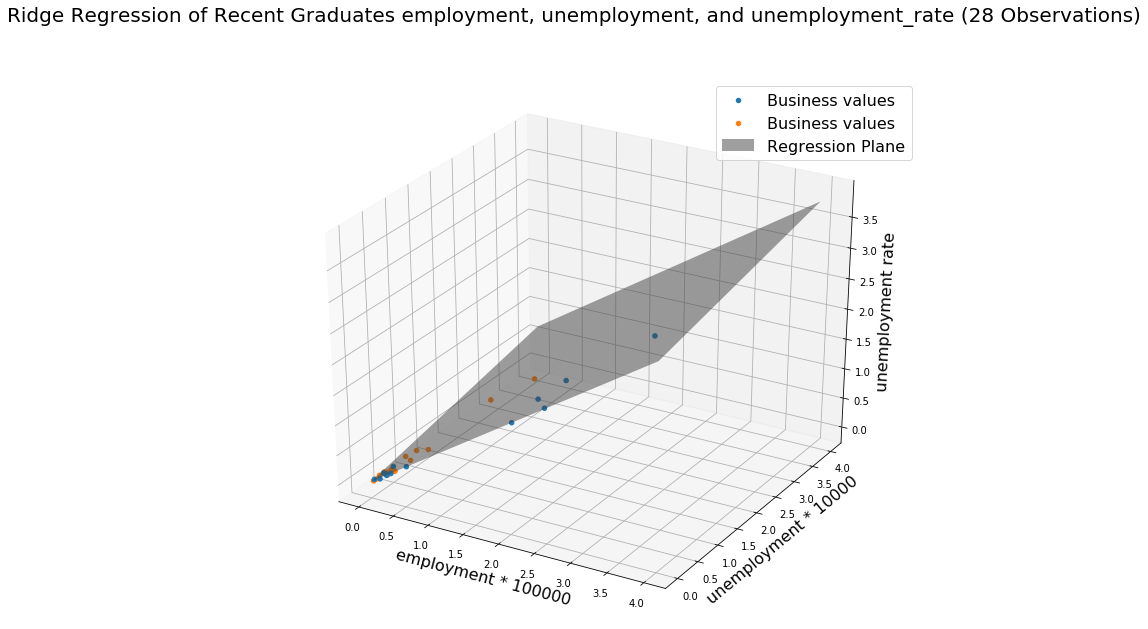

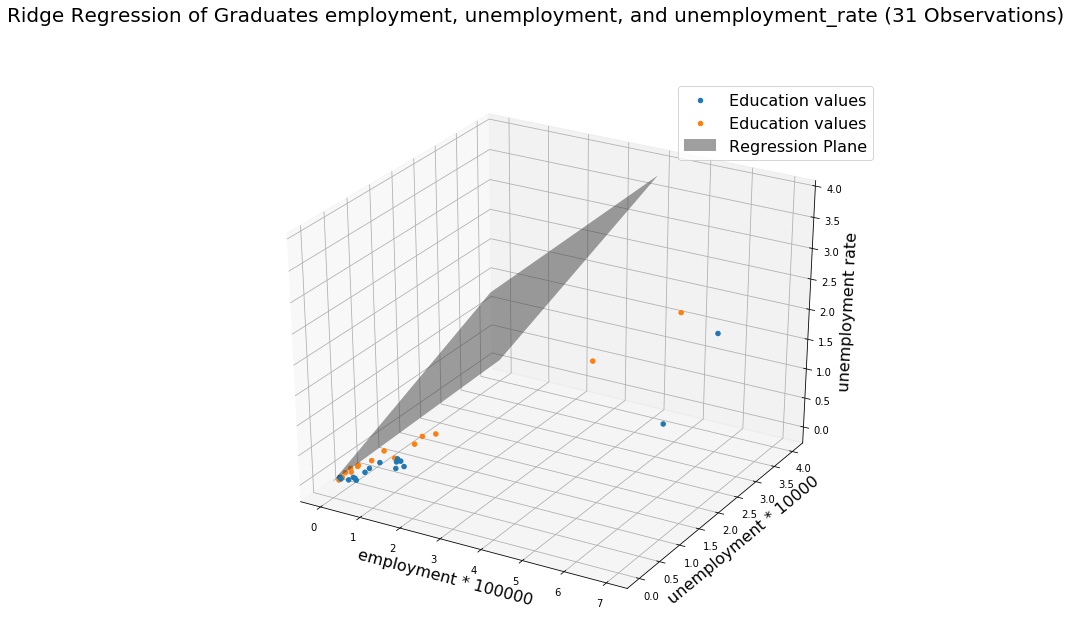

In [35]:
grad_ridge_reg_2D(rg_x1, rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_ridge_reg_2D(g_x1, g_x2, g_yy, pop_major_g, "Graduates")

**Lasso Regression**

*1-D Data Domain*

In [36]:
def grad_lasso_reg_1D(x,y,maj,df_type):
    x_val = np.array([item[0] for item in x], dtype=np.float32)
    y_val = np.array([item[0] for item in y], dtype=np.float32)
    x_label = [item[1] for item in x]
    y_label = [item[1] for item in y]
    _lambda = 0.1
    X = np.vstack([x_val, np.ones(len(x_val))]).T
    A1 = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y_val)
    S = np.sign(A1)
    A = (np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_val) - (S * _lambda / 2)))
    xt = [0,4]
    yt = A * xt
    title = ('Lasso Regression of %s unemployment and unemployment_rate (%d Observations)' %
             (df_type,len(x_val)))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[0]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[0]], label=maj[0] + " values")
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[1]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[1]], label=maj[1] + " values")
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("unemployment * 10000", fontsize=18)
    plt.ylabel("unemployment_rate", fontsize=18)
    plt.grid(True)
    plt.legend(fontsize=18)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/lasso_reg_1d_%s.jpeg" % grad_status)
    plt.savefig(savefig_title)
    plt.show()

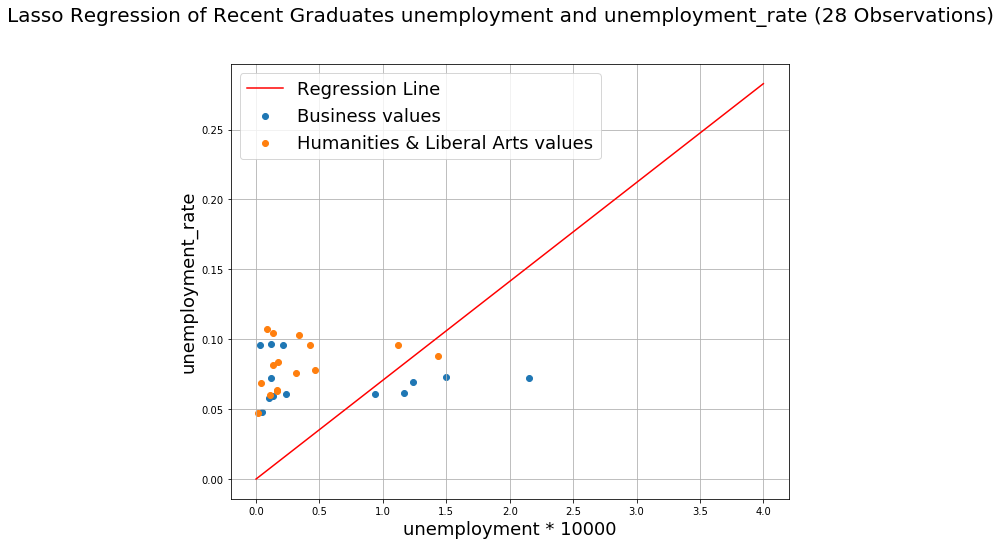

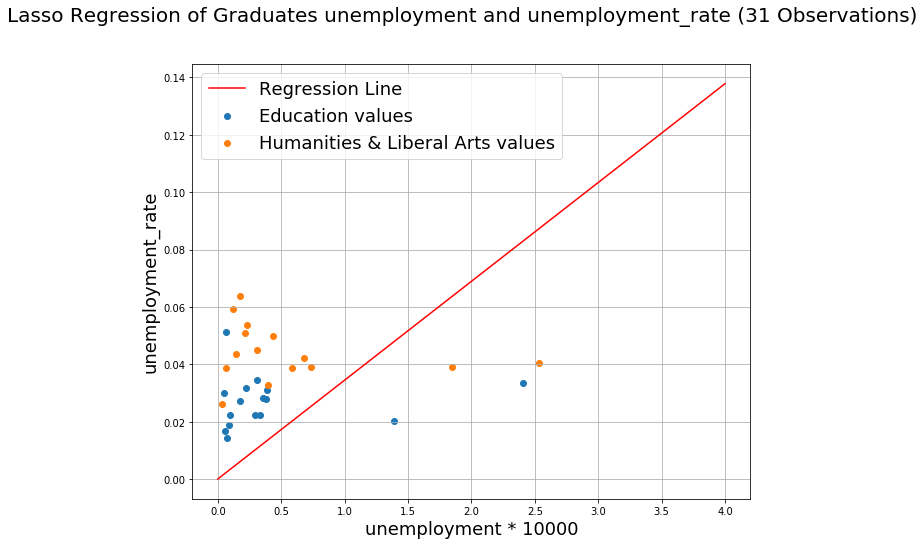

In [37]:
grad_lasso_reg_1D(rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_lasso_reg_1D(g_x2, g_yy, pop_major_g, "Graduates")

*1-D Data Domain*

In [38]:
def grad_lasso_reg_2D(x1,x2,yy,maj,df_type):
    x1_val = np.array([item[0] for item in x1], dtype=np.float32)
    x1_label = [item[1] for item in x1]
    x2_val = np.array([item[0] for item in x2], dtype=np.float32)
    x2_label = [item[1] for item in x2]
    yy_val = np.array([item[0] for item in x2], dtype=np.float32)
    yy_label = [item[1] for item in yy]
    _lambda = 0.1
    XX = np.vstack([x1_val, x2_val]).T
    nn = len(XX.T.dot(XX))
    AA1 = (np.linalg.inv(XX.T.dot(XX))).dot(XX.T).dot(yy_val)
    SS = np.sign(AA1)
    AA = (np.linalg.inv(XX.T.dot(XX)).dot(XX.T.dot(yy_val) - (SS * _lambda / 2)))
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Lasso Regression of %s employment, unemployment, and unemployment_rate (%d Observations)' %
             (df_type,len(x1_val)))
    figure.suptitle(title, fontsize=20)
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[0]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[0]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[0]], label=maj[0] + " values",
               alpha=1.0, cmap="Blue")
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[1]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[1]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[1]], label=maj[0] + " values",
               alpha=1.0, cmap="Orange")
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='gray',alpha=0.5)
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("employment * 100000", fontsize=16)
    ax.set_ylabel("unemployment * 10000", fontsize=16)
    ax.set_zlabel("unemployment_rate",fontsize=16)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/lasso_reg_2d_%s.jpeg" % grad_status)
    figure.savefig(savefig_title)

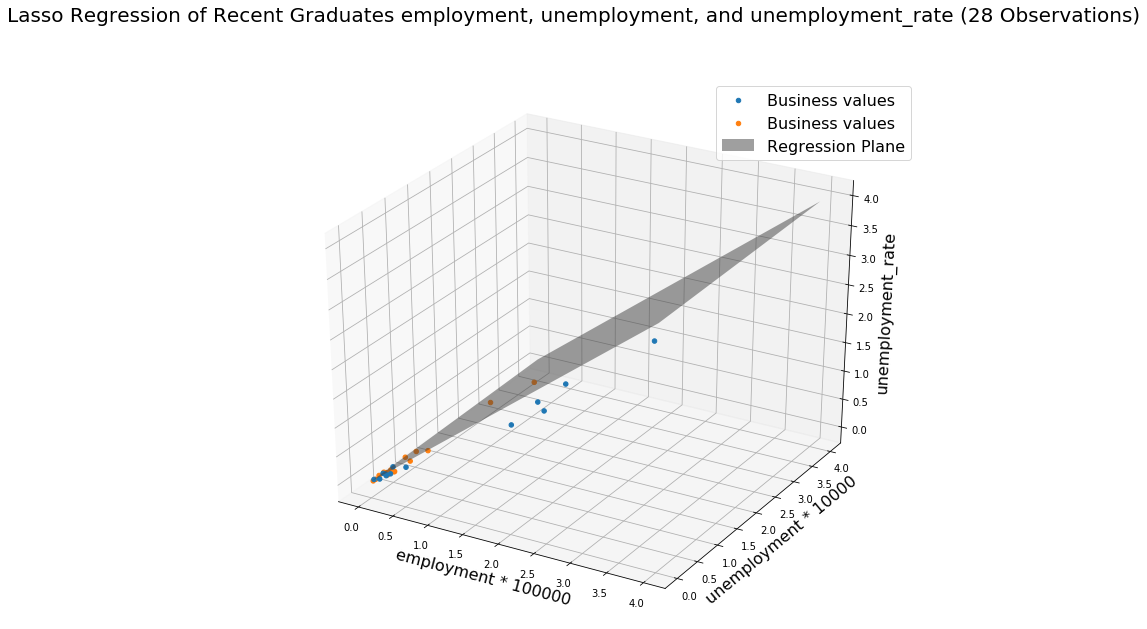

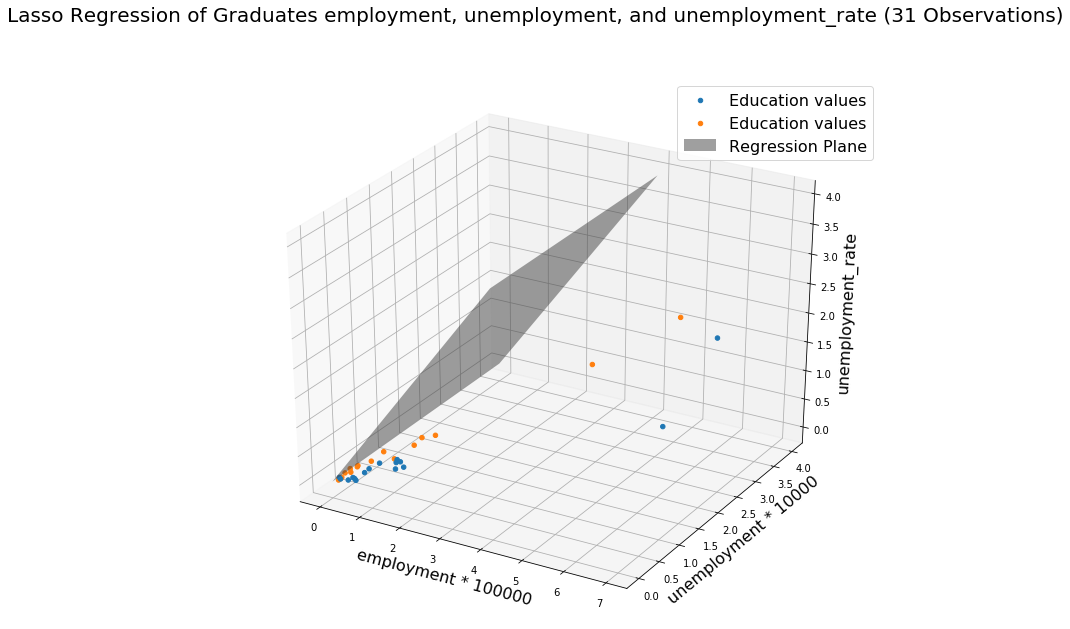

In [39]:
grad_lasso_reg_2D(rg_x1, rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_lasso_reg_2D(g_x1, g_x2, g_yy, pop_major_g, "Graduates")

**Elastic-Net Regression**

*1-D Data Domain*

In [40]:
def grad_en_reg_1D(x,y,maj,df_type):
    x_val = np.array([item[0] for item in x], dtype=np.float32)
    y_val = np.array([item[0] for item in y], dtype=np.float32)
    x_label = [item[1] for item in x]
    y_label = [item[1] for item in y]
    lambda1 = 0.1
    lambda2 = 0.2
    X = np.vstack([x_val, np.ones(len(x_val))]).T
    A1 = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y_val)
    S = np.sign(A1)
    A = (np.linalg.inv(X.T.dot(X) + lambda1).dot(X.T.dot(y_val) - (S * lambda2 / 2)))
    xt = [0,4]
    yt = A * xt
    title = ('Elastic-Net Regression of %s unemployment and unemployment_rate (%d Observations)' %
             (df_type,len(x_val)))
    plt.figure(figsize=(10,8)).suptitle(title, fontsize=20)
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[0]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[0]], label=maj[0] + " values")
    plt.scatter([item[0] for item in zip(x_val, x_label) if item[1] == maj[1]],
                [item[0] for item in zip(y_val, y_label) if item[1] == maj[1]], label=maj[1] + " values")
    plt.plot(xt, yt, 'r', label='Regression Line')
    plt.xlabel("unemployment * 10000", fontsize=18)
    plt.ylabel("unemployment_rate", fontsize=18)
    plt.grid(True)
    plt.legend(fontsize=18)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/en_reg_1d_%s.jpeg" % grad_status)
    plt.savefig(savefig_title)
    plt.show()

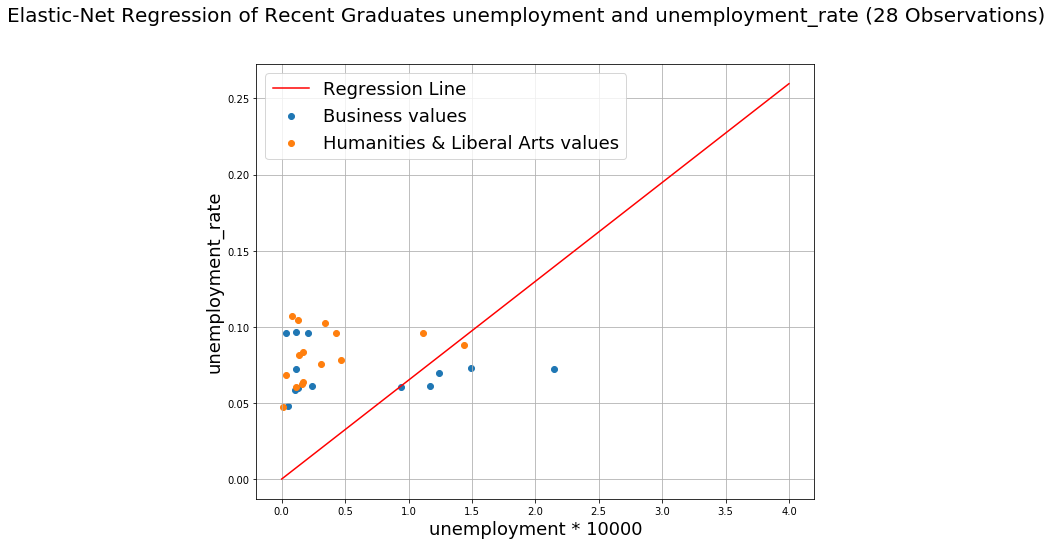

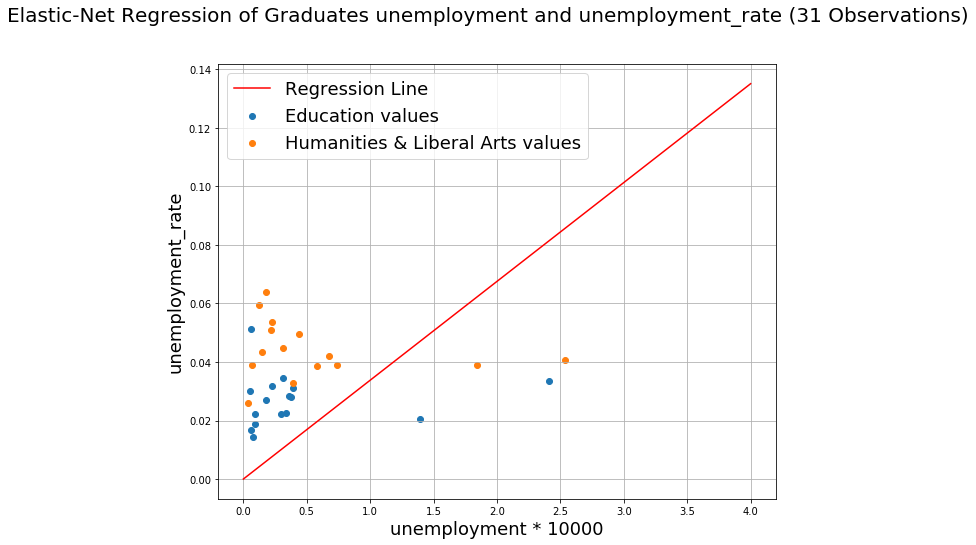

In [41]:
grad_en_reg_1D(rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_en_reg_1D(g_x2, g_yy, pop_major_g, "Graduates")

In [42]:
def grad_en_reg_2D(x1,x2,yy,maj,df_type):
    x1_val = np.array([item[0] for item in x1], dtype=np.float32)
    x1_label = [item[1] for item in x1]
    x2_val = np.array([item[0] for item in x2], dtype=np.float32)
    x2_label = [item[1] for item in x2]
    yy_val = np.array([item[0] for item in x2], dtype=np.float32)
    yy_label = [item[1] for item in yy]
    lambda1 = 0.1
    lambda2 = 0.2
    XX = np.vstack([x1_val, x2_val]).T
    nn = len(XX.T.dot(XX))
    AA1 = (np.linalg.inv(XX.T.dot(XX))).dot(XX.T).dot(yy_val)
    SS = np.sign(AA1)
    AA = (np.linalg.inv(XX.T.dot(XX) + (lambda1 * np.eye(nn))).dot(XX.T.dot(yy_val) - (SS * lambda2 / 2)))
    xx1 = [0,0,4,4]
    xx2 = [0,4,0,4]
    xxx = [xx1,xx2]
    yy1 = np.matmul(AA,xxx)
    yy2 = np.reshape(yy1,(2,2))
    mg1,mg2 = np.meshgrid([0,4],[0,4])
    figure = plt.figure(figsize=(12,10))
    ax = figure.add_subplot(111, projection='3d')
    title = ('Elastic-Net Regression of %s employment, unemployment, and unemployment_rate (%d Observations)' 
             % (df_type,len(x1_val)))
    figure.suptitle(title, fontsize=20)
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[0]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[0]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[0]], label=maj[0] + " values",
               alpha=1.0, cmap="Blue")
    ax.scatter([item[0] for item in zip(x1_val, x1_label) if item[1] == maj[1]],
               [item[0] for item in zip(x2_val, x2_label) if item[1] == maj[1]],
               [item[0] for item in zip(yy_val, yy_label) if item[1] == maj[1]], label=maj[0] + " values",
               alpha=1.0, cmap="Orange")
    surf = ax.plot_surface(mg1,mg2,yy2,label='Regression Plane',color='gray',alpha=0.5)
    surf._facecolors2d = surf._facecolors3d
    surf._edgecolors2d = surf._edgecolors3d
    ax.legend(fontsize=16)
    ax.set_xlabel("employment * 100000", fontsize=16)
    ax.set_ylabel("unemployment * 10000", fontsize=16)
    ax.set_zlabel("unemployment_rate",fontsize=16)
    grad_status = "grad"
    
    if df_type == "Recent Graduates":
        grad_status = "recent_grad"
    
    savefig_title = ("../../docs/CSC510_Assignment2_docs/en_reg_2d_%s.jpeg" % grad_status)
    figure.savefig(savefig_title)

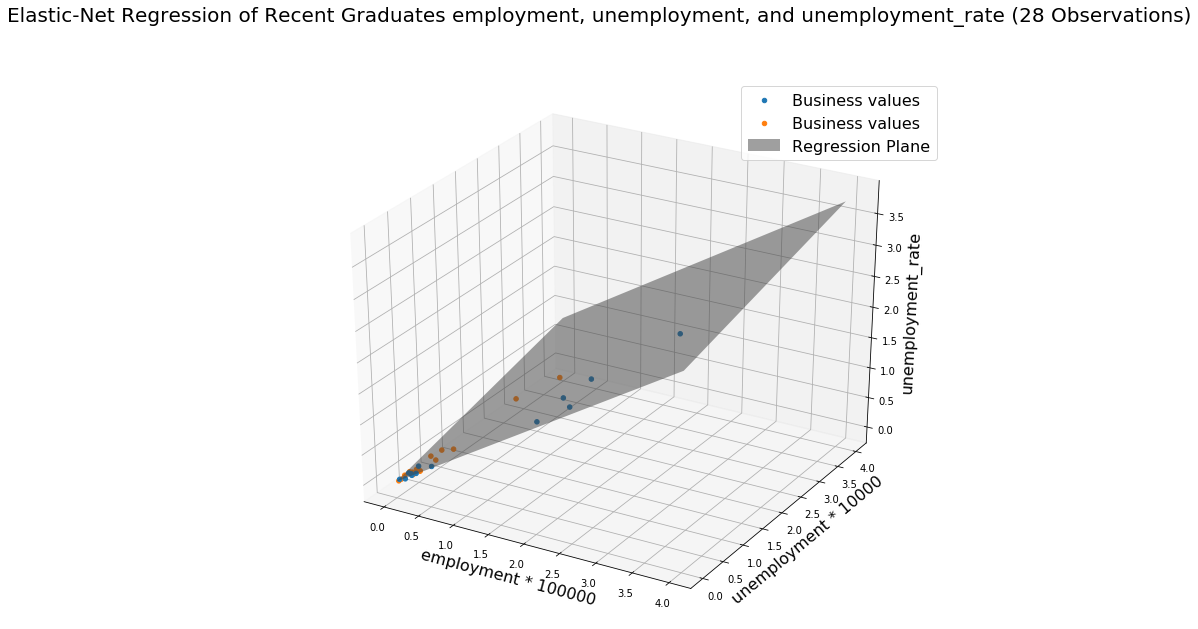

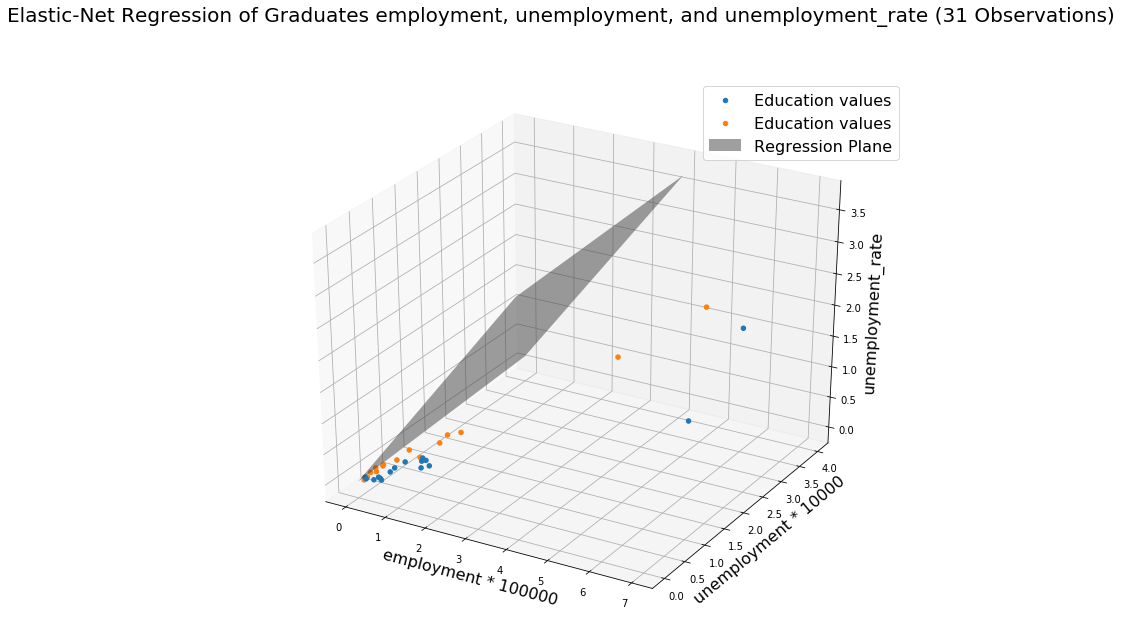

In [43]:
grad_en_reg_2D(rg_x1, rg_x2, rg_yy, pop_major_rg, "Recent Graduates")

grad_en_reg_2D(g_x1, g_x2, g_yy, pop_major_g, "Graduates")

## *Network Intrusion Dataset and Random Forest*

In [46]:
v1 = sqlContext.read.csv("../../data/CSC-510_Assignment2_Data/nslkdd-version1.csv", inferSchema="true", header=True).na.drop()
v2 = sqlContext.read.csv("../../data/CSC-510_Assignment2_Data/nslkdd-version2.csv", inferSchema="true", header=True).na.drop()

In [47]:
print("Number of nslkdd-version1.csv observations:", v1.count())
print("Number of nslkdd-version2.csv observations:", v2.count())

Number of nslkdd-version1.csv observations: 25192
Number of nslkdd-version2.csv observations: 25192


In [48]:
v1_feats = [c[0] for c in v1.dtypes if c[1] == "int" or c[1] == "double"]
v2_feats = [c[0] for c in v2.dtypes if (c[1] == "int" or c[1] == "double") and c[0] != "a42"]

In [49]:
for col in v1_feats:
    v1.describe([col]).show()

+-------+------------------+
|summary|                a1|
+-------+------------------+
|  count|             25192|
|   mean|305.05410447761193|
| stddev| 2686.555640061755|
|    min|                 0|
|    max|             42862|
+-------+------------------+

+-------+------------------+
|summary|                a5|
+-------+------------------+
|  count|             25192|
|   mean|24330.628215306446|
| stddev| 2410805.402027761|
|    min|                 0|
|    max|         381709090|
+-------+------------------+

+-------+------------------+
|summary|                a6|
+-------+------------------+
|  count|             25192|
|   mean|3491.8471737059385|
| stddev| 88830.71832952353|
|    min|                 0|
|    max|           5151385|
+-------+------------------+

+-------+--------------------+
|summary|                  a7|
+-------+--------------------+
|  count|               25192|
|   mean|7.939028262940616E-5|
| stddev|0.008909945628106706|
|    min|                   

+-------+-------------------+
|summary|                a36|
+-------+-------------------+
|  count|              25192|
|   mean|0.14745276278184874|
| stddev|0.30836659108783937|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+--------------------+
|summary|                 a37|
+-------+--------------------+
|  count|               25192|
|   mean|0.031844236265478706|
| stddev| 0.11057496885808385|
|    min|                 0.0|
|    max|                 1.0|
+-------+--------------------+

+-------+------------------+
|summary|               a38|
+-------+------------------+
|  count|             25192|
|   mean|0.2858002540489096|
| stddev|0.4453164751115453|
|    min|               0.0|
|    max|               1.0|
+-------+------------------+

+-------+------------------+
|summary|               a39|
+-------+------------------+
|  count|             25192|
|   mean|0.2798463798031175|
| stddev|0.4460753261474882|
|    min|    

In [50]:
for col in v2_feats:
    v2.describe([col]).show()

+-------+--------------------+
|summary|                  a7|
+-------+--------------------+
|  count|               25192|
|   mean|7.939028262940616E-5|
| stddev|0.008909945628106706|
|    min|                   0|
|    max|                   1|
+-------+--------------------+

+-------+--------------------+
|summary|                  a8|
+-------+--------------------+
|  count|               25192|
|   mean|0.023737694506192442|
| stddev| 0.26022077717098974|
|    min|                   0|
|    max|                   3|
+-------+--------------------+

+-------+--------------------+
|summary|                  a9|
+-------+--------------------+
|  count|               25192|
|   mean|7.939028262940616E-5|
| stddev|0.008909945628106706|
|    min|                   0|
|    max|                   1|
+-------+--------------------+

+-------+--------------------+
|summary|                 a10|
+-------+--------------------+
|  count|               25192|
|   mean|0.023737694506192442|
| std

+-------+------------------+
|summary|               a38|
+-------+------------------+
|  count|             25192|
|   mean|0.2858002540489096|
| stddev|0.4453164751115453|
|    min|               0.0|
|    max|               1.0|
+-------+------------------+

+-------+------------------+
|summary|               a39|
+-------+------------------+
|  count|             25192|
|   mean|0.2798463798031175|
| stddev|0.4460753261474882|
|    min|               0.0|
|    max|               1.0|
+-------+------------------+

+-------+-------------------+
|summary|                a40|
+-------+-------------------+
|  count|              25192|
|   mean|0.11780009526833982|
| stddev|0.30586924566877277|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+-------------------+
|summary|                a41|
+-------+-------------------+
|  count|              25192|
|   mean|0.11876945061924482|
| stddev|0.31733346824600817|
|    min|                

In [51]:
print("Number of numerical features in nslkdd-version1:",
      len(v1_feats))
print("\nNumber of numerical features in nslkdd-version2:",
      len(v2_feats))

Number of numerical features in nslkdd-version1: 38

Number of numerical features in nslkdd-version2: 35


In [52]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import math

def rand_forest_best_features(features, frame):
    label_type = frame.select("a42").dtypes[0][1] == "string"
    vector_assembler = VectorAssembler(inputCols=features, outputCol="features")
    frame_temp = vector_assembler.transform(frame)
    
    for col in frame.columns:
        if col != "a42":
            frame_temp = frame_temp.drop(col)
    
    if label_type == True: 
        str_indexer = StringIndexer(inputCol="a42", outputCol="a42_index")
        frame_temp = str_indexer.fit(frame_temp).transform(frame_temp)
        
    (train, test) = frame_temp.randomSplit([0.8, 0.2])
    label = "a42"
    
    if label_type == True:
        label = "a42_index"
    
    rf = RandomForestClassifier(labelCol=label, featuresCol="features", numTrees=5)
    model = rf.fit(train)
    pred = model.transform(test)
    evaluator = MulticlassClassificationEvaluator(labelCol=label, predictionCol='prediction',
                                                 metricName="accuracy")
    accuracy = evaluator.evaluate(pred)
    paramGrid = (ParamGridBuilder().addGrid(rf.maxDepth, [2,4,6])
                 .addGrid(rf.maxBins,[20,60]).addGrid(rf.numTrees,[10,20]).build())
    cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
    cv_model = cv.fit(train)
    cv_pred = cv_model.transform(test)
    cv_accuracy = evaluator.evaluate(cv_pred)
    
    return model.featureImportances, (1.0 - accuracy), (1.0 - cv_accuracy)

In [53]:
v1_rand_forest_best_feats = rand_forest_best_features(v1_feats, v1)
v1_val_of_importance = sorted(feat for feat in zip(v1_rand_forest_best_feats[0], v1_feats))
v1_best_features = []

print("Multiclass Classification Evaluator Test Error = %g" % v1_rand_forest_best_feats[1])
print("Cross Validation Test Error = %g" % v1_rand_forest_best_feats[2])
print("\nImportance of nslkdd-version1 features from least to greatest:")

for accuracy, feat_name in v1_val_of_importance:
    col_and_accuracy = (feat_name, np.round(accuracy, decimals=2))
    print("\tColumn '%s' has %s accuracy" % col_and_accuracy)
    
    if col_and_accuracy[1] >= np.round(v1_rand_forest_best_feats[2], decimals=2):
        v1_best_features.append(col_and_accuracy)

Multiclass Classification Evaluator Test Error = 0.0422143
Cross Validation Test Error = 0.0270808

Importance of nslkdd-version1 features from least to greatest:
	Column 'a14' has 0.0 accuracy
	Column 'a15' has 0.0 accuracy
	Column 'a16' has 0.0 accuracy
	Column 'a17' has 0.0 accuracy
	Column 'a18' has 0.0 accuracy
	Column 'a19' has 0.0 accuracy
	Column 'a20' has 0.0 accuracy
	Column 'a21' has 0.0 accuracy
	Column 'a22' has 0.0 accuracy
	Column 'a29' has 0.0 accuracy
	Column 'a7' has 0.0 accuracy
	Column 'a9' has 0.0 accuracy
	Column 'a31' has 0.0 accuracy
	Column 'a12' has 0.0 accuracy
	Column 'a11' has 0.0 accuracy
	Column 'a1' has 0.0 accuracy
	Column 'a41' has 0.0 accuracy
	Column 'a27' has 0.0 accuracy
	Column 'a10' has 0.0 accuracy
	Column 'a13' has 0.01 accuracy
	Column 'a28' has 0.01 accuracy
	Column 'a8' has 0.01 accuracy
	Column 'a32' has 0.01 accuracy
	Column 'a24' has 0.01 accuracy
	Column 'a37' has 0.01 accuracy
	Column 'a33' has 0.02 accuracy
	Column 'a40' has 0.02 accur

In [54]:
v2_rand_forest_best_feats = rand_forest_best_features(v2_feats, v2)
v2_val_of_importance = sorted(feat for feat in zip(v2_rand_forest_best_feats[0], v2_feats))
v2_best_features = []
print("Multiclass Classification Evaluator Test Error = %g" % v2_rand_forest_best_feats[1])
print("Cross Validation Test Error = %g" % v2_rand_forest_best_feats[2])
print("\nImportance of nslkdd-version2 features from least to greatest:")

for accuracy, feat_name in v2_val_of_importance:
    col_and_accuracy = (feat_name, np.round(accuracy, decimals=2))
    print("\tColumn '%s' has %s accuracy" % col_and_accuracy)
    
    if col_and_accuracy[1] >= np.round(v2_rand_forest_best_feats[2], decimals=2):
        v2_best_features.append(col_and_accuracy)

Multiclass Classification Evaluator Test Error = 0.0915364
Cross Validation Test Error = 0.0405927

Importance of nslkdd-version2 features from least to greatest:
	Column 'a10' has 0.0 accuracy
	Column 'a11' has 0.0 accuracy
	Column 'a13' has 0.0 accuracy
	Column 'a16' has 0.0 accuracy
	Column 'a17' has 0.0 accuracy
	Column 'a19' has 0.0 accuracy
	Column 'a20' has 0.0 accuracy
	Column 'a21' has 0.0 accuracy
	Column 'a22' has 0.0 accuracy
	Column 'a28' has 0.0 accuracy
	Column 'a31' has 0.0 accuracy
	Column 'a7' has 0.0 accuracy
	Column 'a18' has 0.0 accuracy
	Column 'a9' has 0.0 accuracy
	Column 'a12' has 0.0 accuracy
	Column 'a14' has 0.0 accuracy
	Column 'a29' has 0.0 accuracy
	Column 'a33' has 0.0 accuracy
	Column 'a38' has 0.01 accuracy
	Column 'a8' has 0.01 accuracy
	Column 'a32' has 0.01 accuracy
	Column 'a15' has 0.01 accuracy
	Column 'a30' has 0.02 accuracy
	Column 'a24' has 0.02 accuracy
	Column 'a37' has 0.02 accuracy
	Column 'a34' has 0.03 accuracy
	Column 'a23' has 0.03 acc

In [55]:
print("The amount of most important features in nslkdd-version1:\n\t%d out of %d features"
      % (len(v1_best_features), len(v1_feats)))
print("The most important features in nslkdd-version1:\n\t%s"
      % [f[0] for f in v1_best_features])
print("The most important features' accuracies in nslkdd-version1:\n\t%s"
      % [f[1] for f in v1_best_features])
print("The total accuracy of the most important features in nslkdd-version1:\n\t%s"
      % sum([acc[1] for acc in v1_best_features]))
print("\n\nThe amount of most important features in nslkdd-version2:\n\t%d out of %d features"
      % (len(v2_best_features), len(v2_feats)))
print("The most important features in nslkdd-version2:\n\t%s"
      % [f[0] for f in v2_best_features])
print("The most important features' accuracies in nslkdd-version2:\n\t%s"
      % [f[1] for f in v2_best_features])
print("The total accuracy of the most important features in nslkdd-version2:\n\t%s"
      % sum([acc[1] for acc in v2_best_features]))

The amount of most important features in nslkdd-version1:
	8 out of 38 features
The most important features in nslkdd-version1:
	['a36', 'a23', 'a39', 'a35', 'a6', 'a38', 'a30', 'a5']
The most important features' accuracies in nslkdd-version1:
	[0.03, 0.04, 0.04, 0.04, 0.11, 0.11, 0.16, 0.3]
The total accuracy of the most important features in nslkdd-version1:
	0.8300000000000001


The amount of most important features in nslkdd-version2:
	6 out of 35 features
The most important features in nslkdd-version2:
	['a40', 'a36', 'a27', 'a26', 'a39', 'a25']
The most important features' accuracies in nslkdd-version2:
	[0.04, 0.04, 0.08, 0.12, 0.23, 0.25]
The total accuracy of the most important features in nslkdd-version2:
	0.76
